In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

from plotting import plot_input, plot_potential
from SRM import SRM

In [2]:
def get_weight(initial_weight, spike_train):
    return np.ones((spike_train.shape[0],1)) * initial_weight

def run_simulation(model, spike_train, weight, pattern_times):
    model.reset_neuron()
    weight, latency = model.run(spike_train, weight, pattern_times)
    weight = np.array([w[0] for w in weight]).reshape((-1,1))
    latency = np.array([l for l in latency])
    return model, weight, latency

## Generating Input

In [19]:
from InputGenerator import generate_input_data
# In order to change the hyperparameters of Input spike train change the hyperparameter.yml file.
generate_input_data()

## Reading Input Data 

In [3]:
folder_name = "input-data"
times = np.load(os.path.join(folder_name, "times.npy"))
indices = np.load(os.path.join(folder_name, "indices.npy"))
times_pattern = np.load(os.path.join(folder_name, "times_pattern.npy"))
indices_pattern = np.load(os.path.join(folder_name, "indices_pattern.npy"))
position_copypaste = np.load(os.path.join(folder_name, "position_copypaste.npy"))
sparse_spike_train = sparse.load_npz(os.path.join(folder_name, "sparse_spike_train.npz"))
spike_train = sparse_spike_train.toarray()
pattern_times = list(np.load(os.path.join(folder_name, "pattern_times.npy")))

In [4]:
## Hyperparameters
with open("hyperparameters.yml", "r") as yaml_file:
    hyperparameters = yaml.safe_load(yaml_file)

# Get hyperparametes
dt = hyperparameters["dt"]
patternlength = hyperparameters["patternlength"]

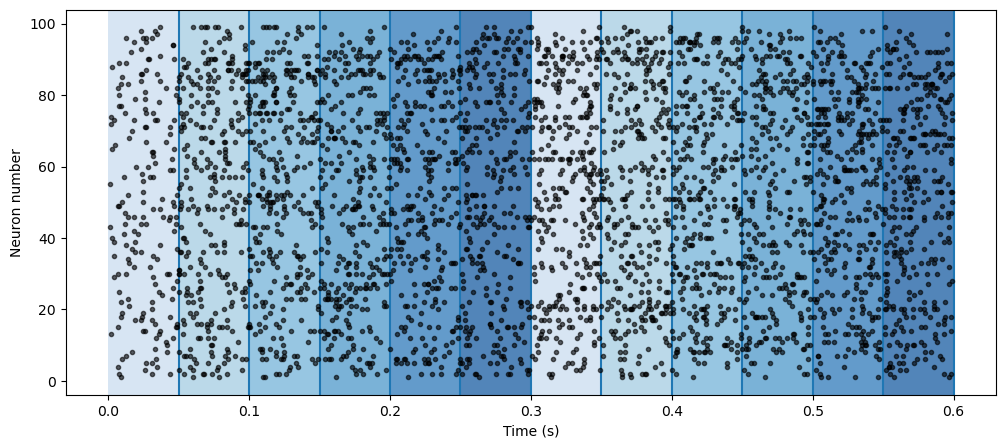

In [5]:
params = {'start_time' : 0.0,
        'end_time' : 0.6,
        'start_index' : 0,
        'end_index' : 100,}

plot_input(times, indices, params)

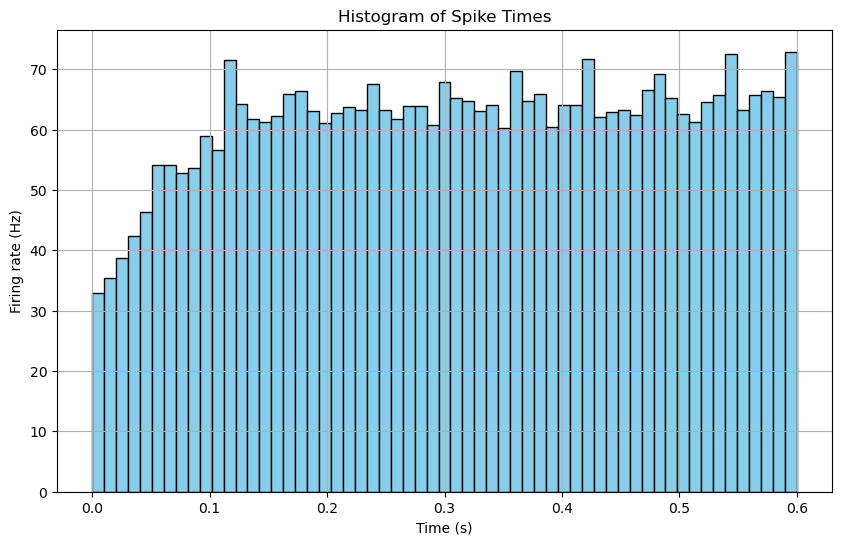

In [6]:
start_time = 0.0
end_time = 0.6
bin_edges = np.linspace(start_time, end_time, num=int(end_time/dt/10))
plt.figure(figsize=(10, 6))
plt.hist(times, bins=bin_edges, color='skyblue', edgecolor='black', weights=np.ones_like(times)* 100/2000)
plt.title('Histogram of Spike Times')
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.grid(True)
plt.show()

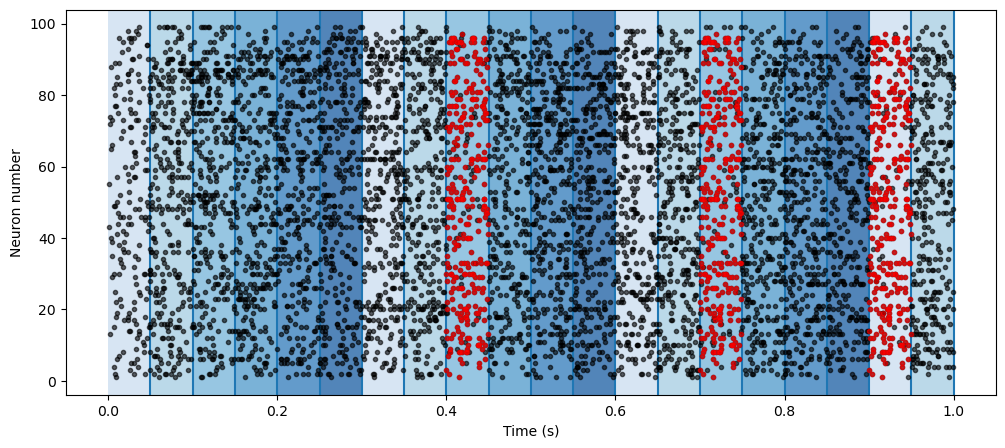

In [7]:
params = {'start_time' : 0.0,
        'end_time' : 1.0,
        'start_index' : 0,
        'end_index' : 100,}

plot_input(times, indices, params, times_pattern, indices_pattern)

## Creating the Model

In [8]:
A_pos= 0.03125
B=0.85
tau_pos=0.0168
tau_neg=0.0337
A_neg = -B*A_pos

print('B factor is:')
print(-A_neg*tau_neg/(A_pos*tau_pos))

threshold = 500
tau_m = 0.010
tau_s = 0.0025
K1 = 2
K2 = 4
dt = 0.001
tref = 0.001
initial_weight = 0.475
weight = get_weight(initial_weight, spike_train)

model = SRM(threshold=threshold, tau_m=tau_m, tau_s=tau_s, K1=K1, K2=K2,
            dt=dt, tref=tref, 
            A_pos= A_pos, B=B, tau_pos=tau_pos, tau_neg=tau_neg)

B factor is:
1.7050595238095239


## Training

In [28]:
model, weight, latency = run_simulation(model, spike_train, weight, pattern_times)

## Results

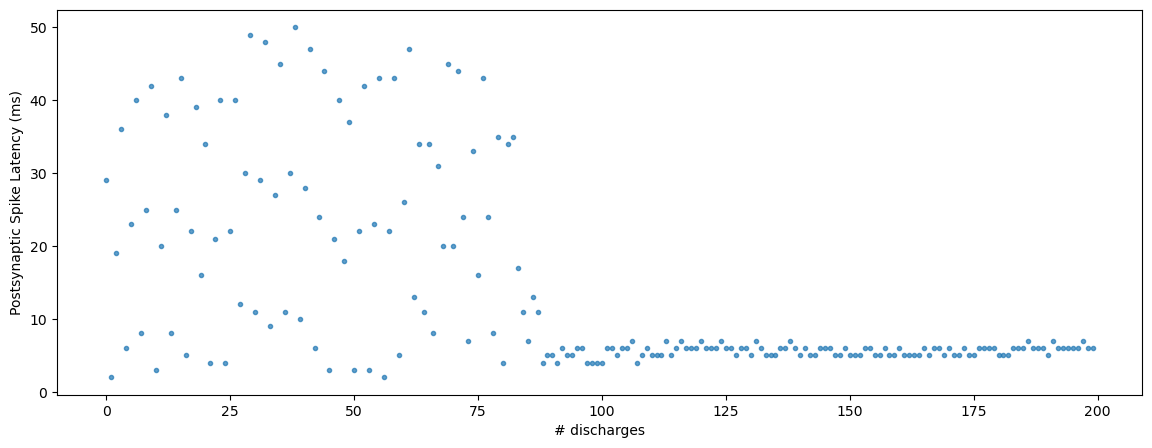

In [33]:
plt.figure(figsize=(14,5))
plt.plot(latency[:200]/dt, '.', alpha=0.7)
plt.ylabel('Postsynaptic Spike Latency (ms)')
plt.xlabel('# discharges')
plt.show()

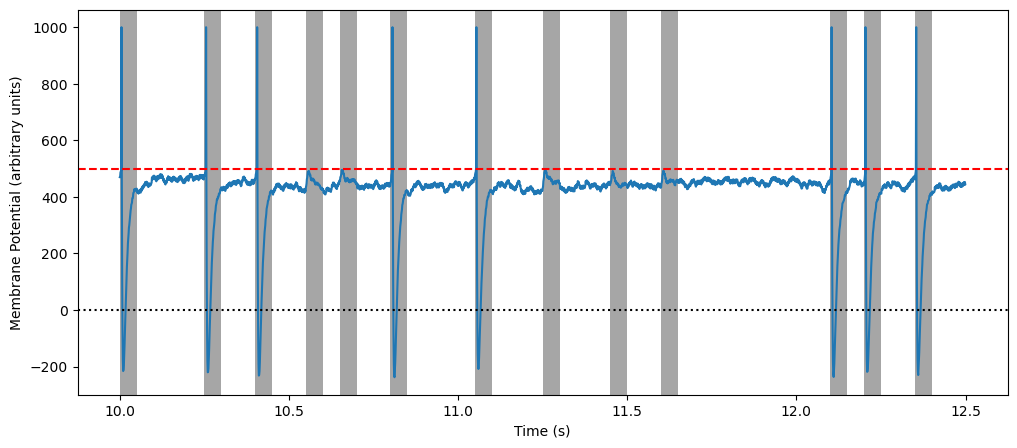

In [40]:
start_time = 10
end_time = 12.5

plot_potential(start_time, end_time, model, position_copypaste, patternlength, dt)

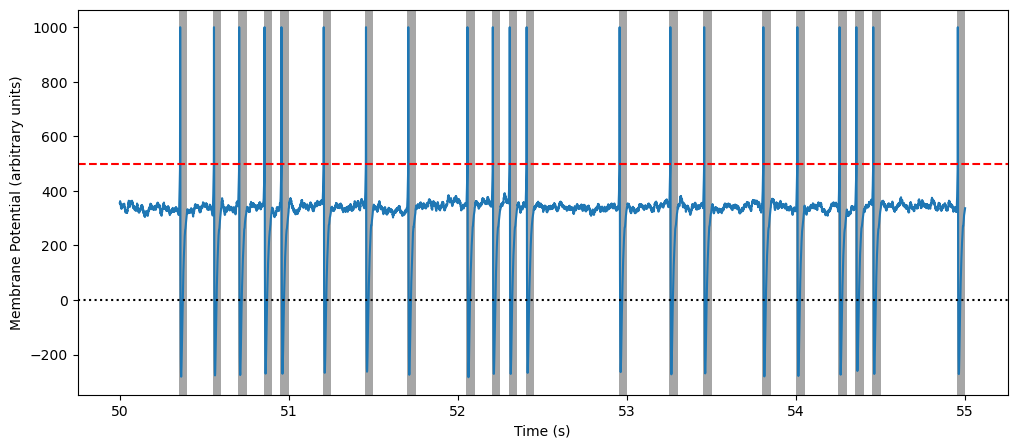

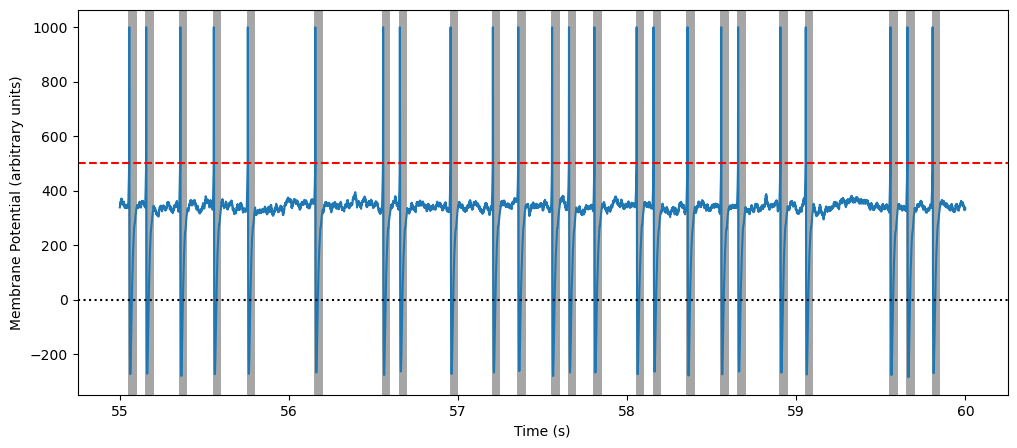

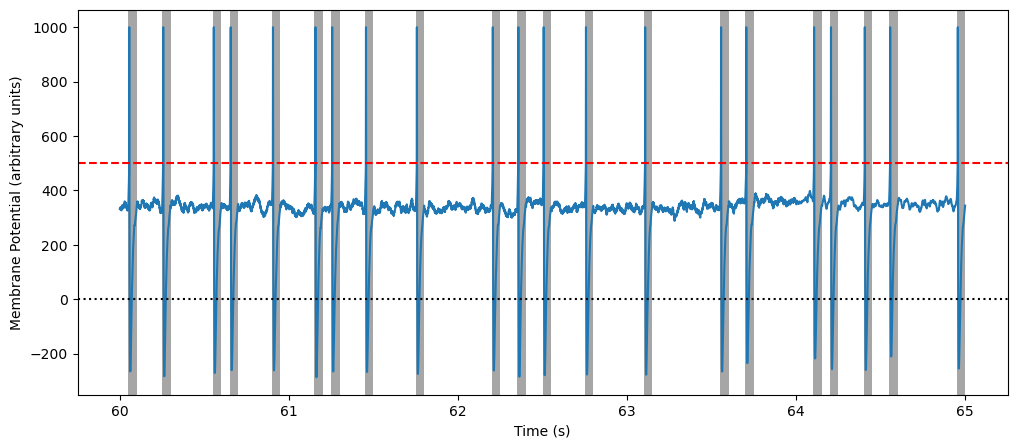

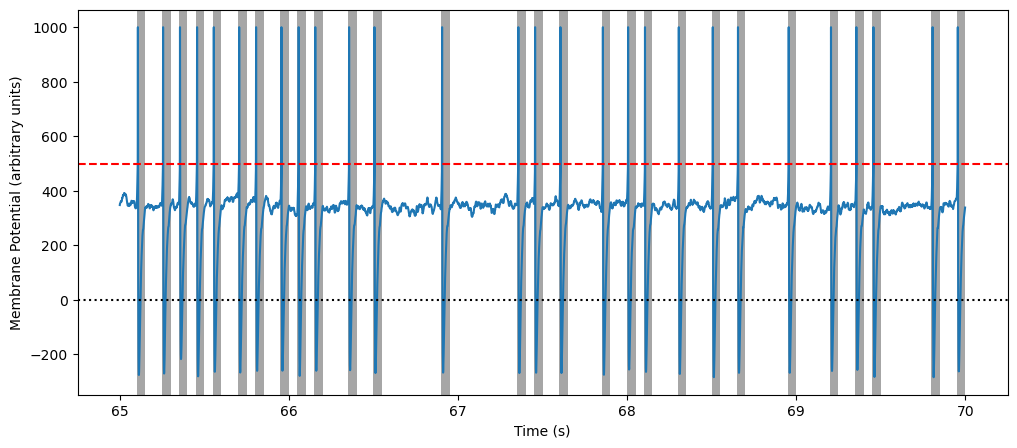

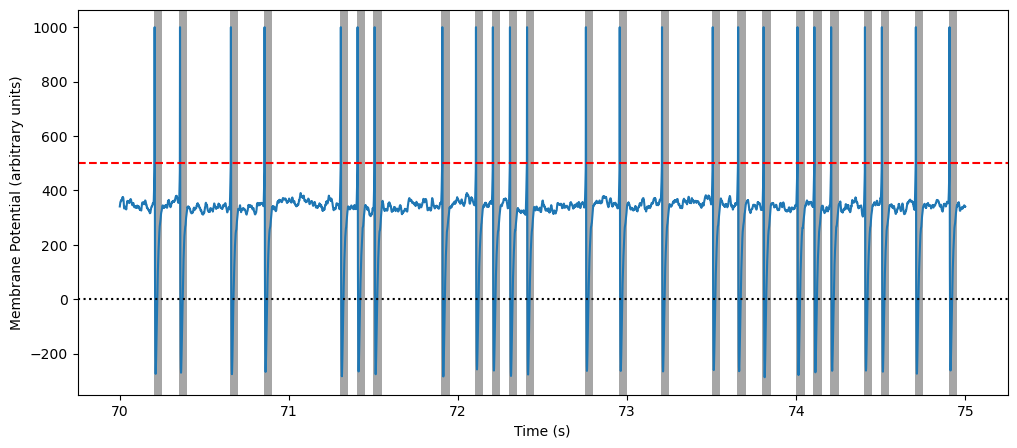

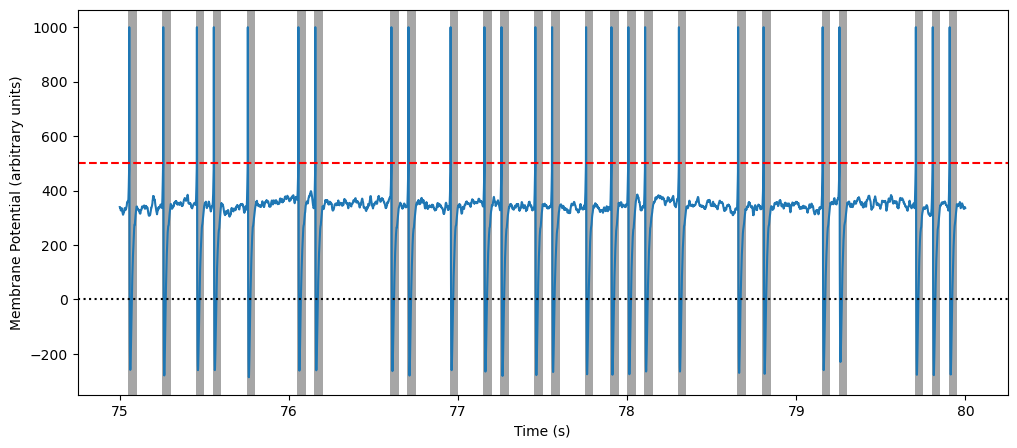

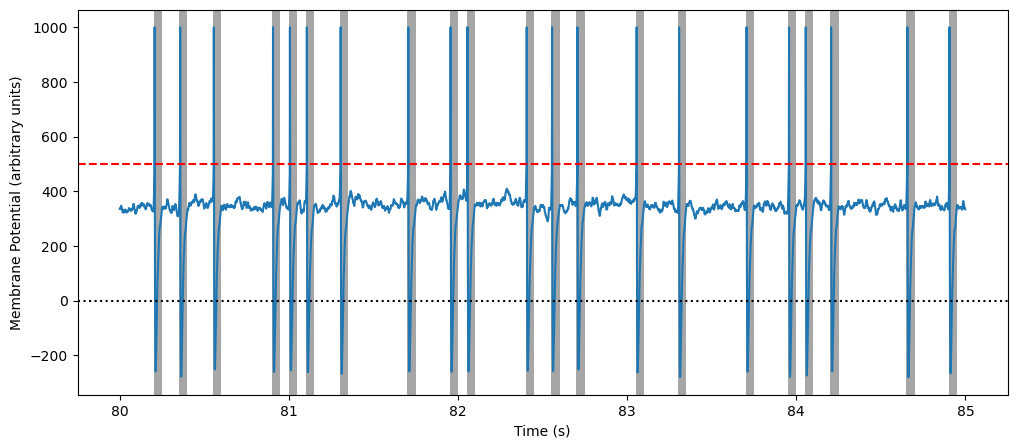

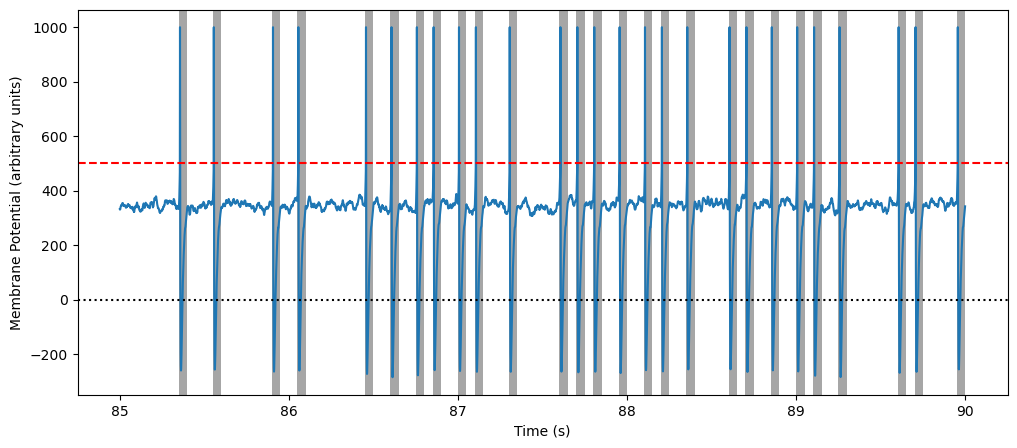

In [35]:
ran = np.arange(50,90,5)
for r in ran:
    plot_potential(r, r+5, model, position_copypaste, patternlength, dt)

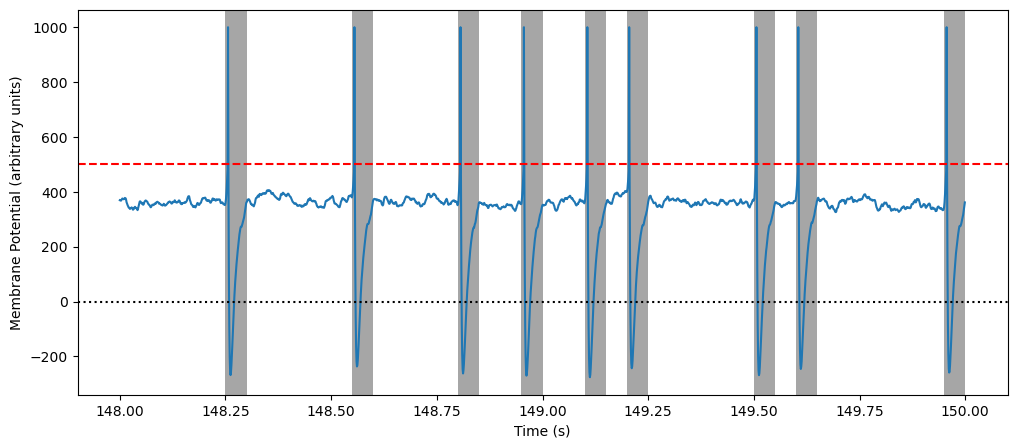

In [36]:
start_time = 148
end_time = 150

plot_potential(start_time, end_time, model, position_copypaste, patternlength, dt)

active neuron ration (w > 0.7): 16.6%


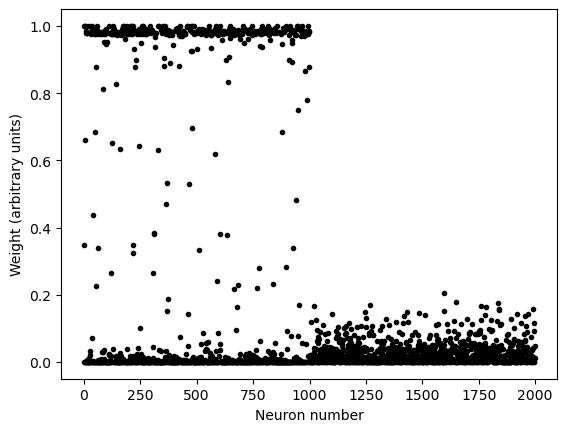

In [37]:
active_ration = np.sum(weight>0.7)/ len(weight) * 100
print(f'active neuron ration (w > 0.7): {active_ration:.1f}%')
plt.plot(np.arange(len(weight)), weight, '.k')
plt.xlabel('Neuron number')
plt.ylabel('Weight (arbitrary units)')
plt.show()

In [68]:
def save_data(path):
    if not os.path.exists(path):
        os.makedirs(path)
    np.save(path + "/weight.npy", weight)
    np.save(path + "/potential_rec.npy", potential_rec)
    np.save(path + "/spike_rec.npy", spike_rec)

potential_rec = model.potential_rec
spike_rec = model.spike_rec
potential_rec = np.array([val for val in potential_rec])
spike_rec = np.array([val for val in spike_rec])

save_data('saved-data')

## Second Experiment

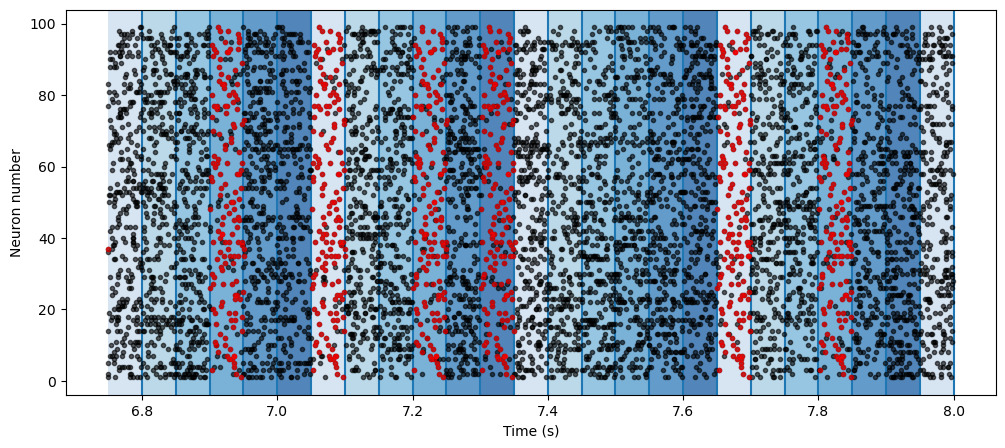

In [ ]:
params = {'start_time' : 6.75,
        'end_time' : 8.0,
        'start_index' : 0,
        'end_index' : 100,}

plot_input(times, indices, params, times_pattern, indices_pattern)

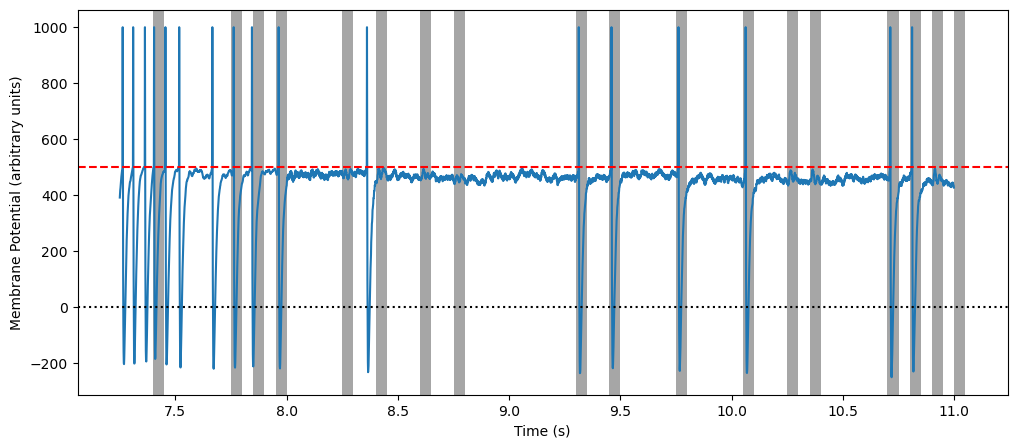

In [ ]:
start_time = 7.25
end_time = 11

plot_potential(start_time, end_time, model, position_copypaste, patternlength, dt)

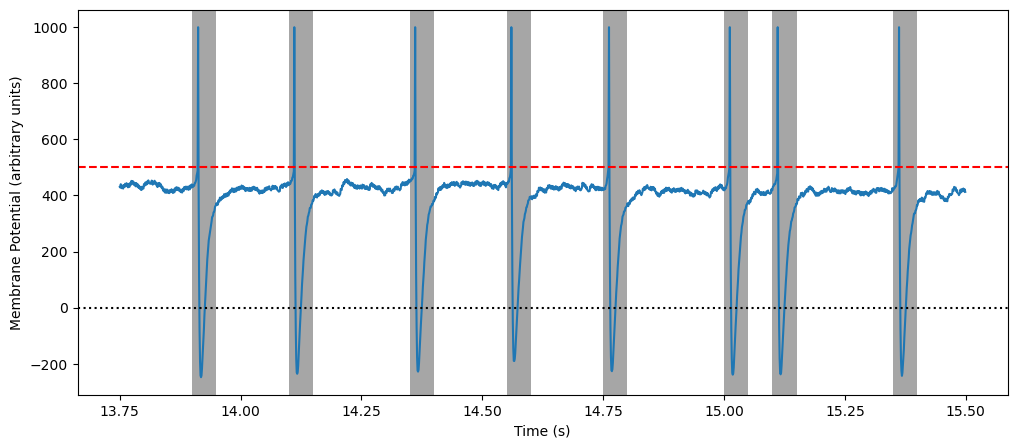

In [ ]:
start_time = 13.75
end_time = 15.5

plot_potential(start_time, end_time, model, position_copypaste, patternlength, dt)

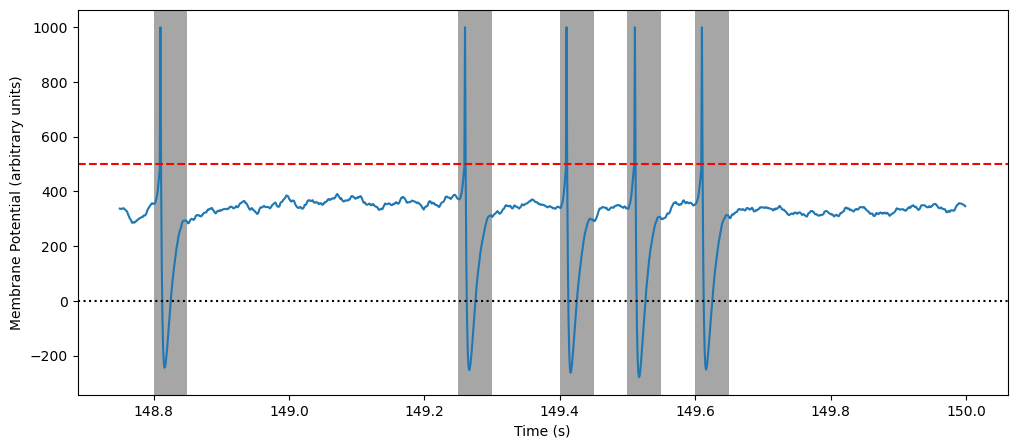

In [ ]:
start_time = 148.75
end_time = 150

plot_potential(start_time, end_time, model, position_copypaste, patternlength, dt)

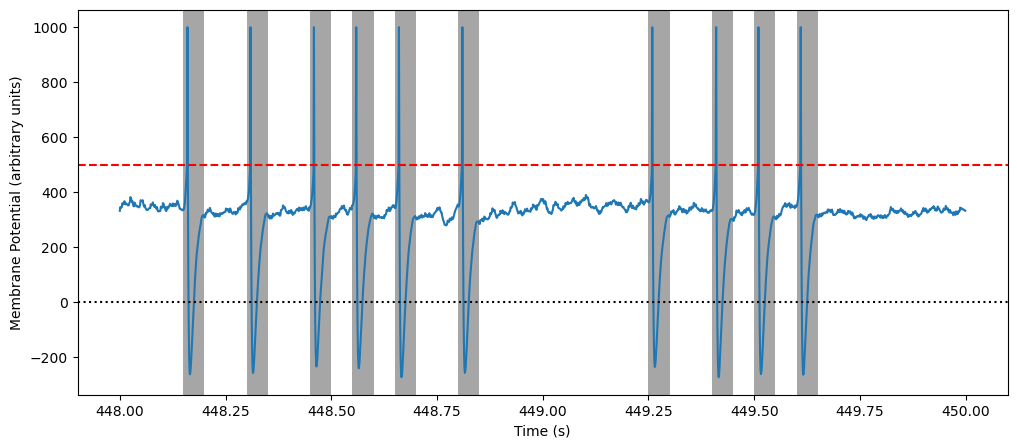

In [ ]:
start_time = 448
end_time = 450.0

plot_potential(start_time, end_time, model, position_copypaste, patternlength, dt)

active neuron ration (w > 0.7): 16.4%


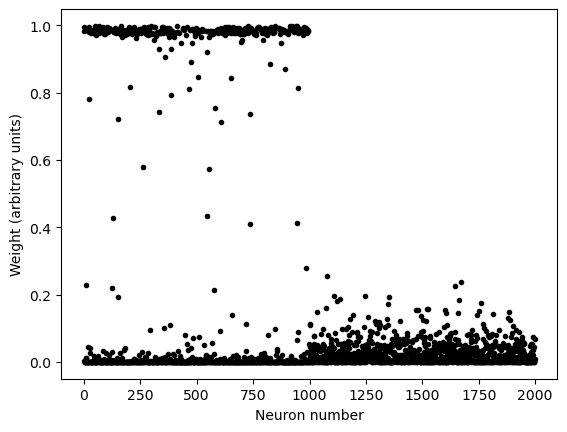

In [ ]:
active_ration = np.sum(weight>0.7)/ len(weight) * 100
print(f'active neuron ration (w > 0.7): {active_ration:.1f}%')
plt.plot(np.arange(len(weight)), weight, '.k')
plt.xlabel('Neuron number')
plt.ylabel('Weight (arbitrary units)')
plt.show()

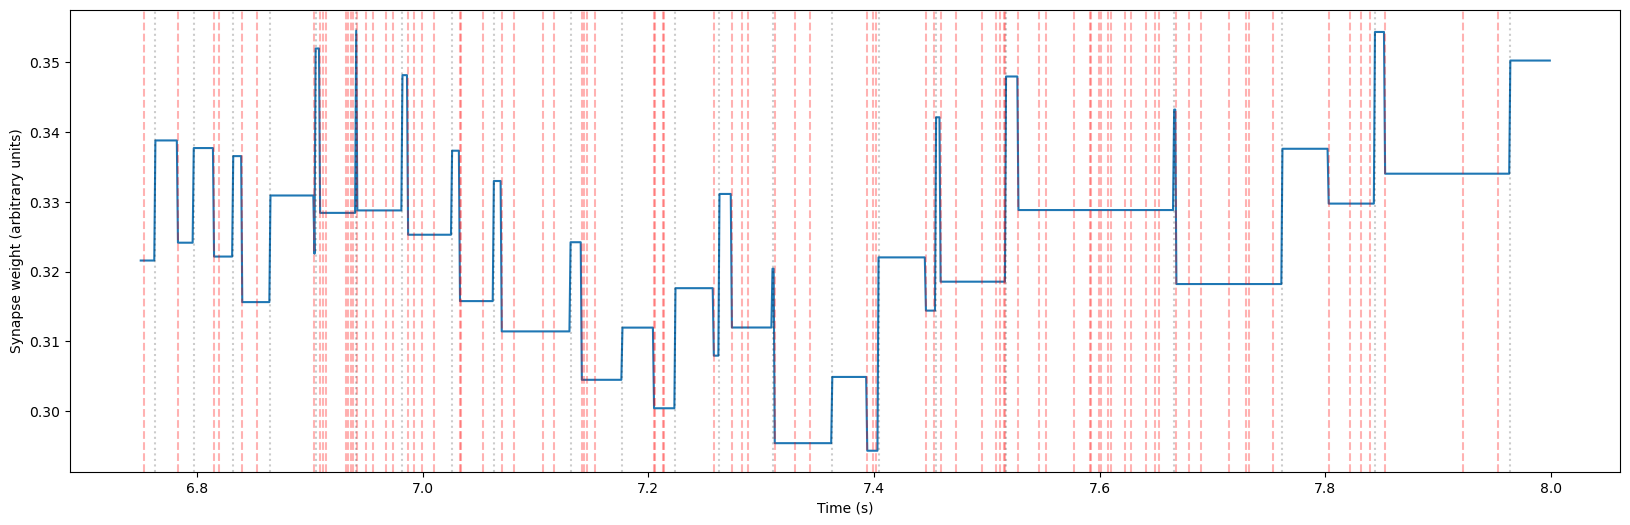

In [ ]:
start_time = int(6.75 / dt)
end_time = int(8 / dt)
neuron0 = spike_train[0, start_time:end_time]
r = np.arange(start_time,end_time,1)

plt.figure(figsize=(20,6))
for i in range(1):
    plt.plot(r*dt, model.w_sample[i, start_time:end_time])

for x in np.where(neuron0 == 1)[0]:
    plt.axvline((x+start_time)*dt, color='red', linestyle='--', alpha=0.3, label='neuron 0 spike')

for spk in model.spike_rec:
    spk = int(spk/dt)
    if spk > start_time and spk < end_time:
        plt.axvline(spk*dt, color='black', linestyle=':', alpha=0.2)

plt.xlabel('Time (s)')
plt.ylabel('Synapse weight (arbitrary units)')

plt.show()

In [10]:
A_pos= 0.03125
B=0.85
tau_pos=0.0168
tau_neg=0.0337
A_neg = -B*A_pos

threshold = 2.9
tau_m = 0.010
tau_s = 0.0025
K1 = 2
K2 = 4
dt = 0.001
tref = 0.001


model_example = SRM(threshold=threshold, tau_m=tau_m, tau_s=tau_s, K1=K1, K2=K2,
            dt=dt, tref=tref, 
            A_pos= A_pos, B=B, tau_pos=tau_pos, tau_neg=tau_neg)

# ####### like in the paper fig.3
spike_train_example = np.zeros((2,75))
spike_train_example[0, [2,23,44,]] = 1
spike_train_example[1, [45,48,61,]] = 1
weight_example = np.array([1,1], dtype=float).reshape(-1,1)

model_example, weight_example, _ = run_simulation(model_example, spike_train_example, weight_example, pattern_times=[0.0, 0.5, 0.1, 2.0])

In [8]:
potential_rec_example = np.array([val for val in model_example.potential_rec])
def plot_membrane_potential(spike_train, potential_rec, threshold):
        plt.figure(figsize=(8,6))
        plt.plot(np.arange(0,len(potential_rec),1), potential_rec)
        spikes = np.where(spike_train ==1)[1]
        for spk in spikes:
            plt.axvline(spk, linestyle='-.', color='gray')
        plt.axhline(threshold, linestyle='dotted', color='orange')
        plt.axhline(0, linestyle='dotted', color='k')
        plt.xlabel('Time (ms)')
        plt.ylabel('Potential (arbitraary units)')
        plt.show()

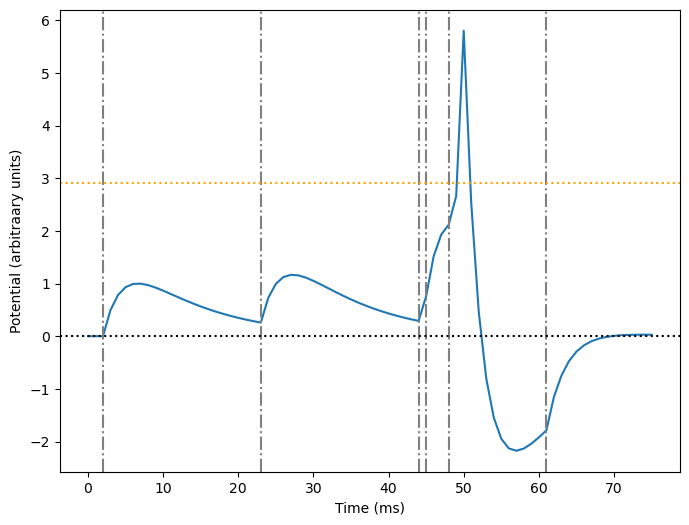

In [9]:
plot_membrane_potential(spike_train_example, potential_rec_example, threshold)